In [38]:
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_kernels
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import PairwiseKernel
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Nadam
import tensorflow as tf
import numpy as np

In [60]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000,784)
print(x_train.shape[0] , "train sample")
print(x_test.shape[0] , "test sample")

60000 train sample
10000 test sample


Verimizi yükledikten sonra test ve train olarak ayırdık. 

In [61]:
x_train = x_train.reshape(x_train.shape[0], -1).astype("float32") / 255
x_test = x_test.reshape(x_test.shape[0], -1).astype("float32") / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Eğitim ve test veri kümelerindeki her bir görüntüyü tek boyutlu bir diziye düzleştirdik ve sayısal kararlılık için öğelerin veri türünü  32-bit floating noktaya dönüştürüp piksel değerlerini 0 ila 1 aralığına getirmek için 255'e bölerek normalleştirme uyguladık.

#   Kmeans

In [5]:
km_model = KMeans(10)
km_model.fit(x_train)
cent = km_model.cluster_centers_
x = km_model.predict(cent)
x = to_categorical(x,10)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
y_train2 = km_model.predict(x_train)
y_train2 = to_categorical(y_train2,10)
y_test2 = km_model.predict(x_test)
y_test2 = to_categorical(y_test2,10)

### RBFLayer


In [7]:
kernel_matrix =  PairwiseKernel(metric='polynomial')
rbf_model = GaussianProcessRegressor(kernel=kernel_matrix).fit(cent,x)

In [8]:
temp = rbf_model.predict(x_train)
temp2 = rbf_model.predict(x_test)

### RBF Model1

In [9]:
model = Sequential()
model.add(Dense(512, activation="relu", input_shape=(10,)))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))  
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5632      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 10762 (42.04 KB)
Trainable params: 10762 (42.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-11-18 17:23:54.239738: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-18 17:23:54.239785: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-18 17:23:54.239808: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-18 17:23:54.239884: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-18 17:23:54.239920: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
nadam = tf.keras.optimizers.Nadam(lr = 0.0005)
model.compile(optimizer= nadam, loss= "categorical_crossentropy",  metrics= ["accuracy"])
history = model.fit(temp, y_train2, batch_size=64, epochs=10, verbose=1,  
                    validation_data=(temp2, y_test2))

Epoch 1/10


2023-11-18 17:23:54.744610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 18s 18ms/step - loss: 0.3401 - accuracy: 0.9351 - val_loss: 0.1425 - val_accuracy: 0.9643
Epoch 2/10
938/938 [==============================] - 18s 19ms/step - loss: 0.1184 - accuracy: 0.9672 - val_loss: 0.1025 - val_accuracy: 0.9715
Epoch 3/10
938/938 [==============================] - 18s 19ms/step - loss: 0.0948 - accuracy: 0.9716 - val_loss: 0.0851 - val_accuracy: 0.9767
Epoch 4/10
938/938 [==============================] - 18s 19ms/step - loss: 0.0839 - accuracy: 0.9740 - val_loss: 0.0807 - val_accuracy: 0.9745
Epoch 5/10
938/938 [==============================] - 18s 20ms/step - loss: 0.0773 - accuracy: 0.9763 - val_loss: 0.0721 - val_accuracy: 0.9771
Epoch 6/10
938/938 [==============================] - 18s 19ms/step - loss: 0.0735 - accuracy: 0.9767 - val_loss: 0.0680 - val_accuracy: 0.9777
Epoch 7/10
938/938 [==============================] - 18s 19ms/step - loss: 0.0726 - accuracy: 0.9761 - val_loss: 0.0680 - val_accuracy: 0.9792
Epo

In [57]:
best_accuracy = max(history.history['accuracy'])
print("Best Training Accuracy:", best_accuracy)

best_val_accuracy = max(history.history['val_accuracy'])
print("Best Validation Accuracy:", best_val_accuracy)

Best Training Accuracy: 0.9771666526794434
Best Validation Accuracy: 0.979200005531311


Modelimiz incelendiğinde val_accuracy değerimiz train accuracy değerimizi göre daha iyi bir sonuç verdiği gözlemlenmiştir. Buda modelimiz için iyi işarettir. Modelimizin iyi bir öğrenim gerçekleştirdiğini söyleyebiliriz.

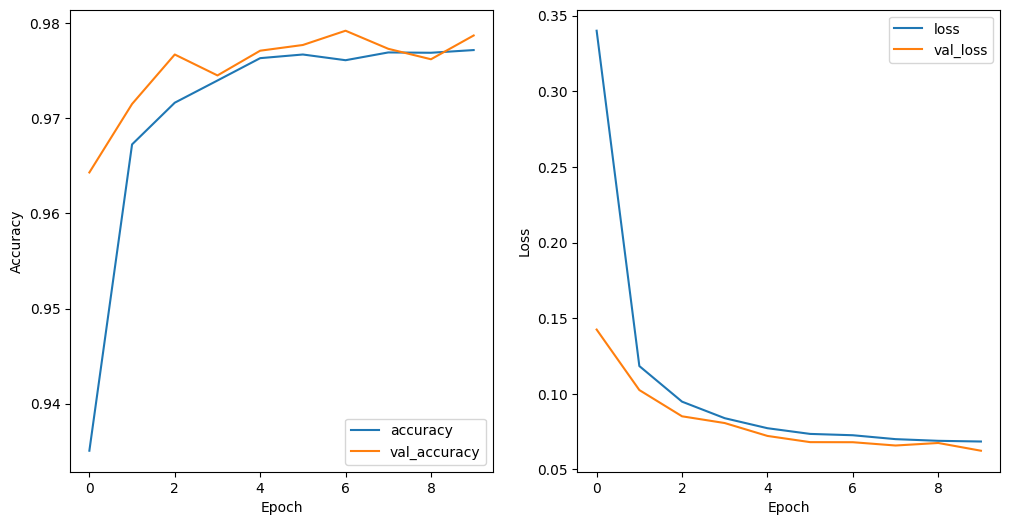

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Grafiğe bakıldığında loss değerlerimizin birbirine çok yakın olduğu ve genele bakıldığında düşük olduğunu söyleyebiliriz. Accuracy değerlerimiz yakın gibi görünüyor fakat val_accurarcy değerimizde tuhaf dalgalanmalarda gözlemlenmektedir.

In [62]:
y_pred = model.predict(temp2)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test2, axis=1)
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

class_report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:")
print(class_report)

313/313 [==============================] - 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       846
           1       0.99      0.98      0.98      1550
           2       0.98      0.99      0.98      1315
           3       0.99      0.97      0.98       929
           4       0.97      0.99      0.98       495
           5       0.97      0.97      0.97       995
           6       0.98      0.99      0.98      1429
           7       0.97      0.98      0.97      1093
           8       0.99      0.99      0.99       799
           9       0.97      0.98      0.97       549

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Genel olarak accuracy scoreumuz %98 lik bir performans göstermiştir.Buda çok yüksek bir değerdir. Modelimizi iyi tahmin ettiğini söyleyeyebiliriz. 

### RBF Model2

In [53]:
model2 = Sequential()
model2.add(Dense(256, activation="relu", input_shape=(10,)))
model2.add(Dropout(0.1))
model2.add(Dense(128, activation = "relu" , input_shape = (10,)))
model2.add(Dropout(0.1))
model2.add(Dense(10, activation="softmax"))  
model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 256)               2816      
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_36 (Dense)            (None, 128)               32896     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_37 (Dense)            (None, 10)                1290      
                                                                 
Total params: 37002 (144.54 KB)
Trainable params: 37002 (144.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
nadam = tf.keras.optimizers.legacy.Nadam(learning_rate=0.0005)
model2.compile(optimizer= nadam, loss= "categorical_crossentropy",  metrics= ["accuracy"])
history2 = model2.fit(temp, y_train2, batch_size=64, epochs=10,
                      verbose=1, validation_data=(temp2, y_test2))

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/optimizers/legacy/nadam.py:89: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


938/938 [==============================] - 30s 31ms/step - loss: 0.3431 - accuracy: 0.9281 - val_loss: 0.1264 - val_accuracy: 0.9656
Epoch 2/10
938/938 [==============================] - 28s 30ms/step - loss: 0.1201 - accuracy: 0.9620 - val_loss: 0.0939 - val_accuracy: 0.9714
Epoch 3/10
938/938 [==============================] - 28s 30ms/step - loss: 0.0997 - accuracy: 0.9678 - val_loss: 0.0807 - val_accuracy: 0.9772
Epoch 4/10
938/938 [==============================] - 29s 30ms/step - loss: 0.0902 - accuracy: 0.9693 - val_loss: 0.0778 - val_accuracy: 0.9734
Epoch 5/10
938/938 [==============================] - 28s 30ms/step - loss: 0.0856 - accuracy: 0.9713 - val_loss: 0.0681 - val_accuracy: 0.9782
Epoch 6/10
938/938 [==============================] - 28s 30ms/step - loss: 0.0835 - accuracy: 0.9729 - val_loss: 0.0683 - val_accuracy: 0.9784
Epoch 7/10
938/938 [==============================] - 28s 30ms/step - loss: 0.0816 - accuracy: 0.9718 - val_loss: 0.0683 - val_accuracy: 0.9777
Epo

In [58]:
best_accuracy = max(history2.history['accuracy'])
print("Best Training Accuracy:", best_accuracy)

best_val_accuracy = max(history2.history['val_accuracy'])
print("Best Validation Accuracy:", best_val_accuracy)

Best Training Accuracy: 0.9728666543960571
Best Validation Accuracy: 0.9805999994277954


İlk modelimizle benzer bir sonuç aldığımız gözlemlenmektedir.

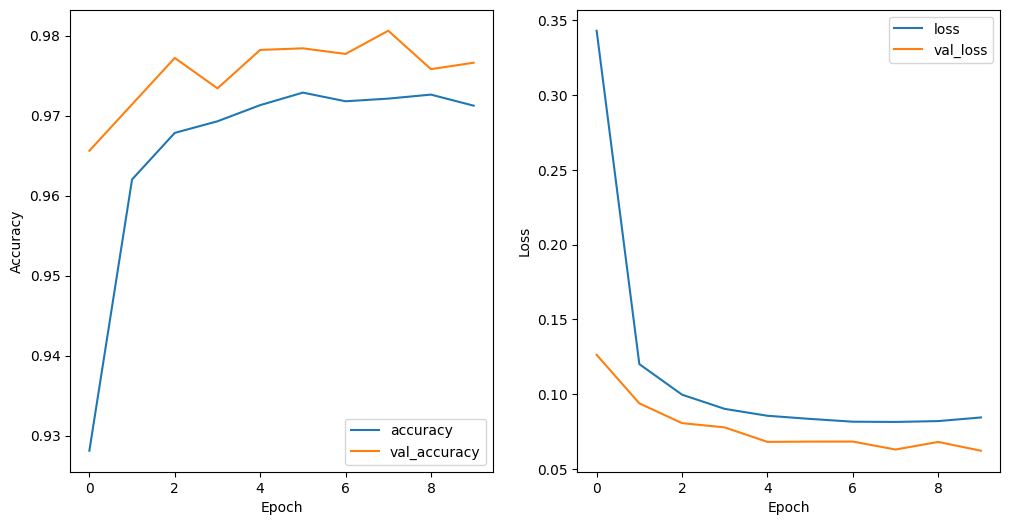

In [55]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Grafiğe bakıldığında loss ve accuracy değerlerimiz ilk yapıtğımız modele göre daha val değerlerimizle test değerlerimizin birbirinden daha ayrı sonuçlar verdiğini söyleyebiliriz.

In [56]:
y_pred = model2.predict(temp2)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test2, axis=1)
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)



class_report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:")
print(class_report)

313/313 [==============================] - 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       846
           1       0.98      0.98      0.98      1550
           2       0.97      0.99      0.98      1315
           3       0.98      0.97      0.98       929
           4       0.97      0.99      0.98       495
           5       0.97      0.96      0.96       995
           6       0.97      0.99      0.98      1429
           7       0.98      0.97      0.97      1093
           8       0.98      0.99      0.98       799
           9       0.98      0.97      0.98       549

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Tahmin değerlerimizin %98 olması iyidir.Fakat ilk modelimizdeki grafiğide göze alırsak 1.modelimiz çok az farkla daha iyi bir sonuç vermiştir.

#   RBF Model3

In [49]:
model3 = Sequential()
model3.add(Dense(256, activation="relu", input_shape=(10,)))
model3.add(Dense(10, activation="softmax"))
model3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 dense_33 (Dense)            (None, 256)               2816      
                                                                 
 dense_34 (Dense)            (None, 10)                2570      
                                                                 
Total params: 5386 (21.04 KB)
Trainable params: 5386 (21.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
nadam = tf.keras.optimizers.legacy.Nadam(learning_rate=0.0005)
model3.compile(optimizer=nadam, loss="categorical_crossentropy", metrics=["accuracy"])
history3 = model3.fit(temp, y_train2, batch_size=128, 
                      epochs=10, verbose=1, validation_data=(temp2, y_test2))

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/optimizers/legacy/nadam.py:89: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


469/469 [==============================] - 12s 25ms/step - loss: 0.8341 - accuracy: 0.8797 - val_loss: 0.3504 - val_accuracy: 0.9360
Epoch 2/10
469/469 [==============================] - 11s 23ms/step - loss: 0.2664 - accuracy: 0.9534 - val_loss: 0.2069 - val_accuracy: 0.9554
Epoch 3/10
469/469 [==============================] - 11s 24ms/step - loss: 0.1798 - accuracy: 0.9633 - val_loss: 0.1597 - val_accuracy: 0.9641
Epoch 4/10
469/469 [==============================] - 11s 24ms/step - loss: 0.1438 - accuracy: 0.9678 - val_loss: 0.1339 - val_accuracy: 0.9689
Epoch 5/10
469/469 [==============================] - 11s 24ms/step - loss: 0.1231 - accuracy: 0.9711 - val_loss: 0.1184 - val_accuracy: 0.9720
Epoch 6/10
469/469 [==============================] - 11s 24ms/step - loss: 0.1098 - accuracy: 0.9734 - val_loss: 0.1078 - val_accuracy: 0.9750
Epoch 7/10
469/469 [==============================] - 11s 24ms/step - loss: 0.1003 - accuracy: 0.9753 - val_loss: 0.0994 - val_accuracy: 0.9748
Epo

In [59]:
best_accuracy = max(history3.history['accuracy'])
print("Best Training Accuracy:", best_accuracy)

best_val_accuracy = max(history3.history['val_accuracy'])
print("Best Validation Accuracy:", best_val_accuracy)

Best Training Accuracy: 0.9789000153541565
Best Validation Accuracy: 0.9785000085830688


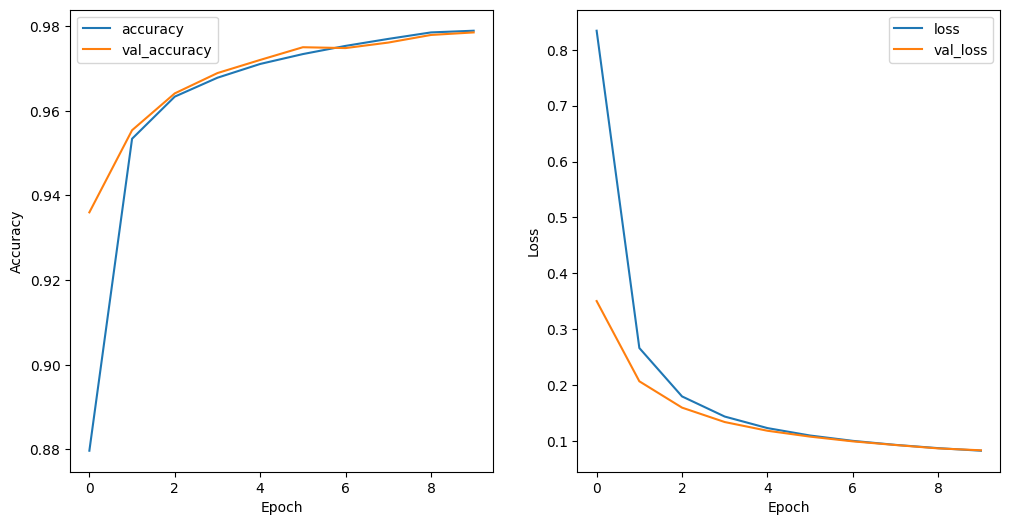

In [51]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'], label='loss')
plt.plot(history3.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Grafiği incelediğimizde val_accuracy ve accuracy değerlerimizin neredeyse birbiri ile aynı haraket ettiğini gözlemleyebiliriz. bu loss değerleri içinde geçerlidir.

In [52]:
y_pred = model3.predict(temp2)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test2, axis=1)
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)


class_report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:")
print(class_report)

313/313 [==============================] - 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       846
           1       0.99      0.98      0.98      1550
           2       0.98      0.99      0.98      1315
           3       0.98      0.97      0.98       929
           4       0.98      0.99      0.98       495
           5       0.96      0.98      0.97       995
           6       0.98      0.99      0.98      1429
           7       0.97      0.97      0.97      1093
           8       1.00      0.98      0.99       799
           9       0.97      0.96      0.97       549

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Son modelimizde de %98 accuracy elde ettiğimiz görebiliriz. Genel bir karşılaştırma tablosuna bakıcak olursak.

ModuleNotFoundError: No module named 'pandas_profiling'